<a href="https://colab.research.google.com/github/1smiley43/Income-Brackets/blob/main/Demographics_and_Income_brackets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [1]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

#Dataset

In [3]:
## Loading data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo files/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Source of data:

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Description of data:

This data houses information on individuals and their income bracket, at either below 50K or equal/above 50K.

The Target:

The target is to predict if a person's 
income will earn below or above 50K.

The Rows:

Each row represents one person in this dataset.

Regression or Classification:

Since there are only two options for the result, this is a classification problem.

In [4]:
df.shape

(48842, 15)

Features and Rows:

This dataset has 48842 rows and 15 features.



Possible Challenges:

There are values of "?" that will need to be addressed. There are many values that will need to be OneHotEncoded.

#Cleaning the Data

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df = df.drop_duplicates()

workclass, fnlwgt, educational-num, marital-status, relationship, and native-country columns won't be necessary for calculations so I'll remove them.

In [10]:
df.drop(columns=['workclass', 'fnlwgt','educational-num','marital-status','relationship', 'native-country'], inplace = True)

<ipython-input-10-393b0db96ec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['workclass', 'fnlwgt','educational-num','marital-status','relationship', 'native-country'], inplace = True)


Missing values are denoted with a "?" in this dataset. To help with visualization, I'm going to replace their values with "Unknown". Changing it to the most frequent or other existing value would skew the data more than I'd like.

In [11]:
#Replacing all instances of "?" with "Unknown" to better label missing values.
df = df.replace({'?': 'Unknown'})

In [12]:
df.head()

,age,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,11th,Machine-op-inspct,Black,Male,0,0,40,<=50K
1,38,HS-grad,Farming-fishing,White,Male,0,0,50,<=50K
2,28,Assoc-acdm,Protective-serv,White,Male,0,0,40,>50K
3,44,Some-college,Machine-op-inspct,Black,Male,7688,0,40,>50K
4,18,Some-college,Unknown,White,Female,0,0,30,<=50K


In [13]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [14]:
df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

In [15]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [16]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unknown              2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [17]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

I don't feel like education lower than high school really need unique values so I'm going to group those all into one.

In [18]:
#Replacing education values less than High School Graduate with 'No Diploma'
df['education'] = df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th', '12th'],'No Diploma')


In [19]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
No Diploma       6399
Masters          2656
Assoc-voc        2060
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Name: education, dtype: int64

# Exploratory Visualizations

In [20]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1080.217688,87.595573,40.425886
std,13.708493,7455.905921,403.209129,12.392729
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Distribution by Occupation')

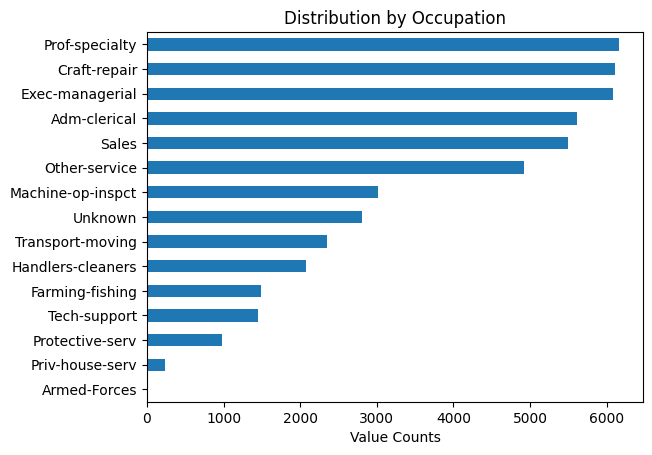

In [21]:
hpw_value_counts = df['occupation'].value_counts(dropna= False).sort_values()
ax = hpw_value_counts.plot(kind = 'barh')
ax.set_xlabel('Value Counts');
ax.set_title('Distribution by Occupation')

Text(0.5, 1.0, 'Distribution by Education Level')

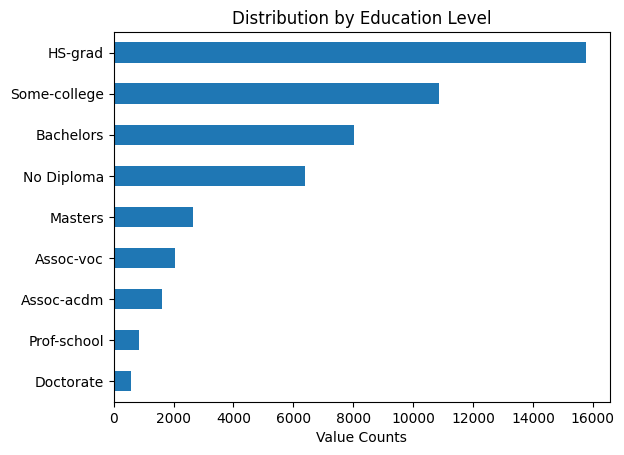

In [22]:
hpw_value_counts = df['education'].value_counts(dropna= False).sort_values()
ax = hpw_value_counts.plot(kind = 'barh')
ax.set_xlabel('Value Counts');
ax.set_title('Distribution by Education Level')

Text(0.5, 1.0, 'Income by Hours per week grouped by Gender')

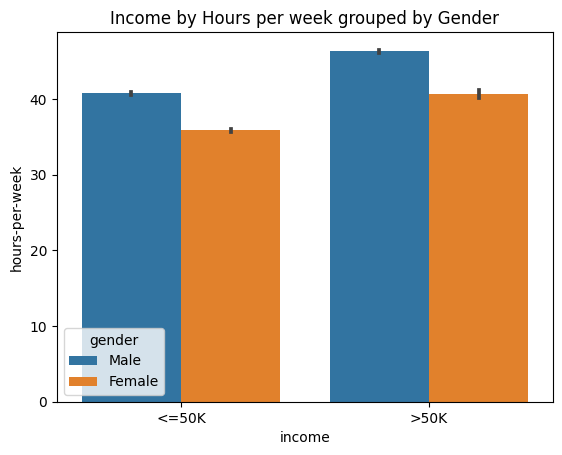

In [23]:
ax = sns.barplot(data = df, x = 'income', y = 'hours-per-week', hue = 'gender')
ax.set_title('Income by Hours per week grouped by Gender')

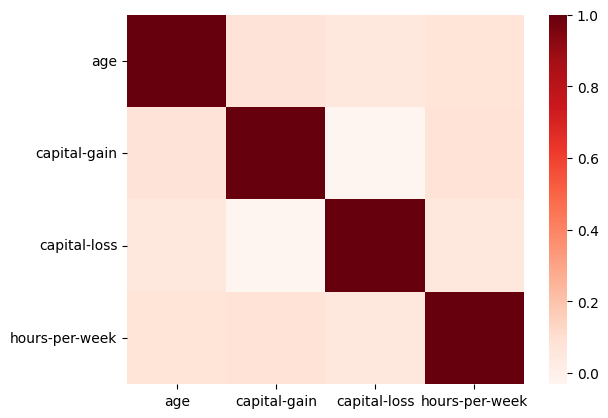

In [24]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Reds');

# Explanatory Visualizations

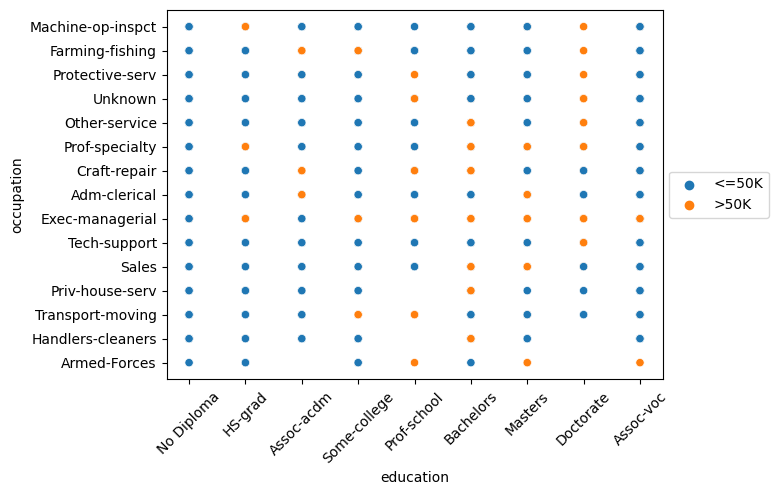

In [25]:
ax = sns.scatterplot(data=df, x = 'education', y = 'occupation', hue = 'income')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


This trend shows that education less than a high school diploma completely excludes members of this group from the higher income bracket entirely. It shows that though some occupations can yield higher earning for lesser education, having some complete form of higher education yields more instances of those earning more than $50K a year.

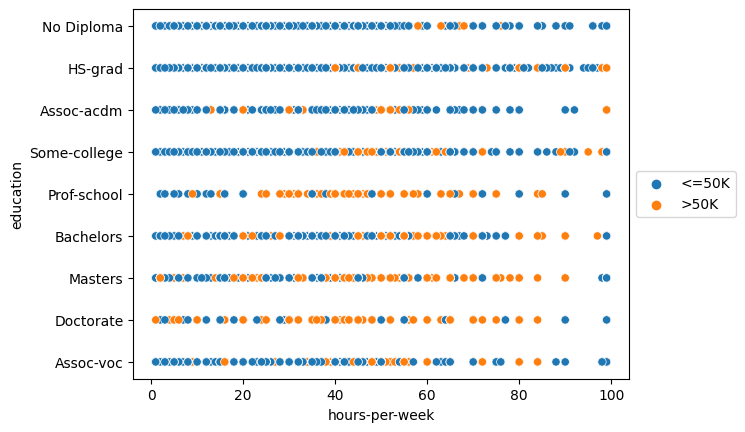

In [26]:
ax = sns.scatterplot(data=df, x = 'hours-per-week', y = 'education', hue = 'income')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Similar to the previous scatterplot, this plot shows that having higher education allows people to work less hours while still earning more than the $50K threshold.

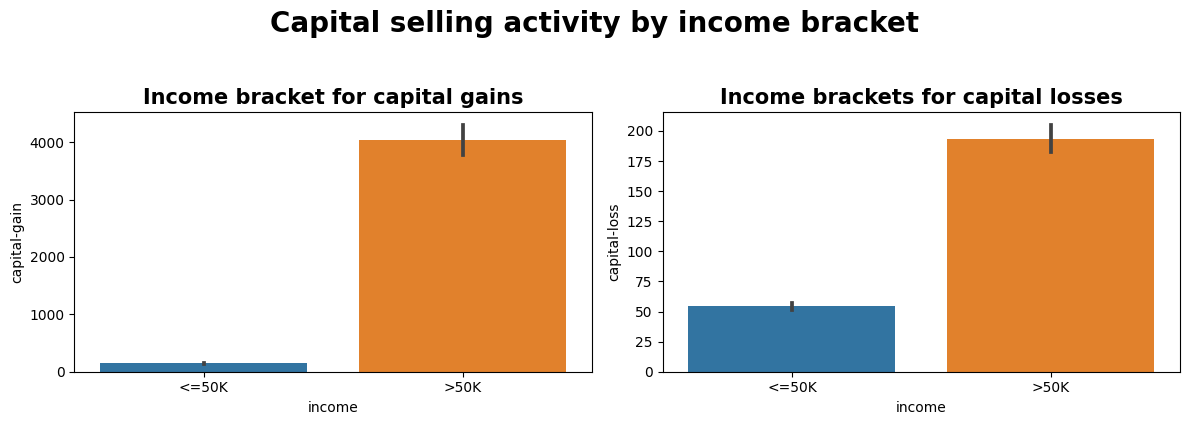

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.barplot(data=df, x = 'income', y = 'capital-gain', ax=axes[0])
axes[0].set_title('Income bracket for capital gains', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df, x = 'income', y = 'capital-loss', ax=axes[1])
axes[1].set_title('Income brackets for capital losses', fontsize = 15, fontweight = 'bold')

fig.suptitle('Capital selling activity by income bracket', fontsize = 20, fontweight = 'bold', y = 1.05)

fig.tight_layout()

In a deviation from the previous two visualizations, this focuses on income and a person's activity in gaining and losing capital. Though those earning more than 50K do contribution more to the amount of capital losses logged, it still pales in comparison to the amount of capital gains shared by this cohort. Conversely, those earning less than 50K enjoy none of the capital gains for spending while factoring in at least 50 units of capital loss. This can highlight how being in a lower income bracket can affect investment opportunities as well.

# Preprocessing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   education       48790 non-null  object
 2   occupation      48790 non-null  object
 3   race            48790 non-null  object
 4   gender          48790 non-null  object
 5   capital-gain    48790 non-null  int64 
 6   capital-loss    48790 non-null  int64 
 7   hours-per-week  48790 non-null  int64 
 8   income          48790 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.7+ MB


In [29]:
df.describe(include = 'object')

,education,occupation,race,gender,income
count,48790,48790,48790,48790,48790
unique,9,15,5,2,2
top,HS-grad,Prof-specialty,White,Male,<=50K
freq,15770,6165,41714,32614,37109


In [37]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1080.217688,87.595573,40.425886,0.239414
std,13.708493,7455.905921,403.209129,12.392729,0.426730
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


In [30]:
print(df.isna().sum())

age               0
education         0
occupation        0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64


Identifying and assigning features and target.

In [31]:
# Assign the target
y = df['income']
# Assign the features by dropping only the target column
X = df.drop(columns = 'income')

In [32]:
# Binarize target column
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

In [41]:
# OneHot Encoding all nominal features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

TypeError: ignored

In [38]:
nom_cols = ['education', 'occupation', 'race', 'gender']
num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

nom_tuple = (ohe, nom_cols)
num_tuple = (scaler, num_cols)

In [39]:
preprocessor = make_column_transformer(num_tuple, nom_tuple,remainder='drop')

Using PCA to visualize data

In [40]:
# scaling again just in case
scaler = StandardScaler()
# Fit & transform data
scaled_df = scaler.fit_transform(X)

ValueError: ignored

In [ ]:
# Instantiate, fit & transform data using PCA
pca = PCA()
pca.fit(scaled_df)

In [ ]:
df = pd.DataFrame(pcs, columns = ['PCA_1', 'PCA_2'])
df.head()

In [ ]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))

plt.scatter(pcs[:,0], pcs[:,1])
plt.title('Visualization of Iris Data Using the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
sns.pairplot(df,hue = 'target')

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

plt.show();

# Train Test Split

In [45]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

ValueError: ignored

In [47]:
# fit PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.fit_transform(X_test_sc)

NameError: ignored

# Logistic Regression

In [52]:
# Make a pipeline and fit a model
logreg_pipe = make_pipeline(preprocessor, LogisticRegression())

# Train the model on the data
logreg_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = logreg_pipe.predict(X_test)

ValueError: ignored

In [ ]:
cm = confusion_matrix(y_test.values, predictions)
cm_df = pd.DataFrame(cm)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, normalize = 'true')

# KNN

In [54]:
# Make a pipeline and fit a model
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())

# Train the model on the data
knn_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = knn_pipe.predict(X_test)

ValueError: ignored

In [55]:
cm = confusion_matrix(y_test.values, predictions)
cm_df = pd.DataFrame(cm)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, normalize = 'true')

NameError: ignored

###Overall, which model would you recommend?